<a href="https://colab.research.google.com/github/Projek-001/Data-mining/blob/main/Tm_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Informasi Dataset ---
Jumlah Record: 995
Jumlah Atribut: 28

Tipe Data:
float64    18
object      7
int64       3
Name: count, dtype: int64

Preprocessing Selesai: Data telah dibersihkan, di-encode, dan di-scale.

Statistik Deskriptif Fitur Utama:
        subscribers   video views        uploads  lowest_monthly_earnings  \
count  9.950000e+02  9.950000e+02     995.000000               995.000000   
mean   2.298241e+07  1.103954e+10    9187.125628             36886.148281   
std    1.752611e+07  1.411084e+10   34151.352254             71858.724092   
min    1.230000e+07  0.000000e+00       0.000000                 0.000000   
25%    1.450000e+07  4.288145e+09     194.500000              2700.000000   
50%    1.770000e+07  7.760820e+09     729.000000             13300.000000   
75%    2.460000e+07  1.355470e+10    2667.500000             37900.000000   
max    2.450000e+08  2.280000e+11  301308.000000            850900.000000   

       highest_yearly_earnings  
count             9.9

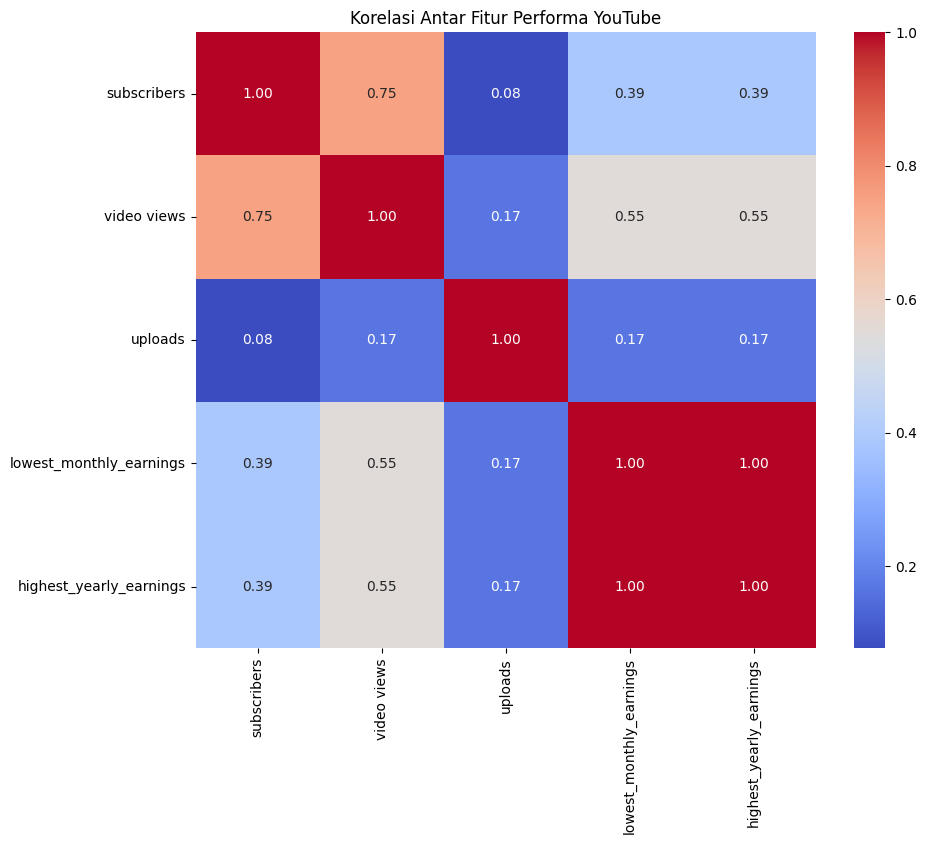

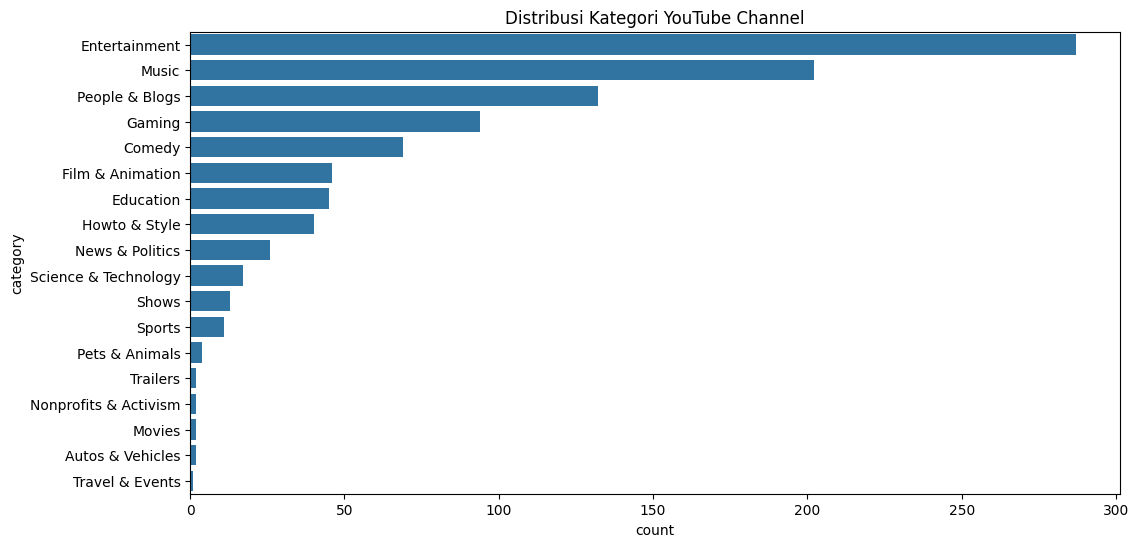


--- Hasil Evaluasi Model ---
Accuracy Score: 0.30

Classification Report:
                      precision    recall  f1-score   support

              Comedy       0.12      0.07      0.09        14
           Education       0.00      0.00      0.00         8
       Entertainment       0.29      0.54      0.37        52
    Film & Animation       0.00      0.00      0.00         8
              Gaming       0.19      0.18      0.18        17
       Howto & Style       0.25      0.20      0.22         5
              Movies       0.00      0.00      0.00         1
               Music       0.49      0.45      0.47        47
     News & Politics       0.67      0.33      0.44         6
      People & Blogs       0.18      0.15      0.16        27
      Pets & Animals       0.00      0.00      0.00         1
Science & Technology       0.00      0.00      0.00         5
               Shows       0.00      0.00      0.00         4
              Sports       0.00      0.00      0.00     

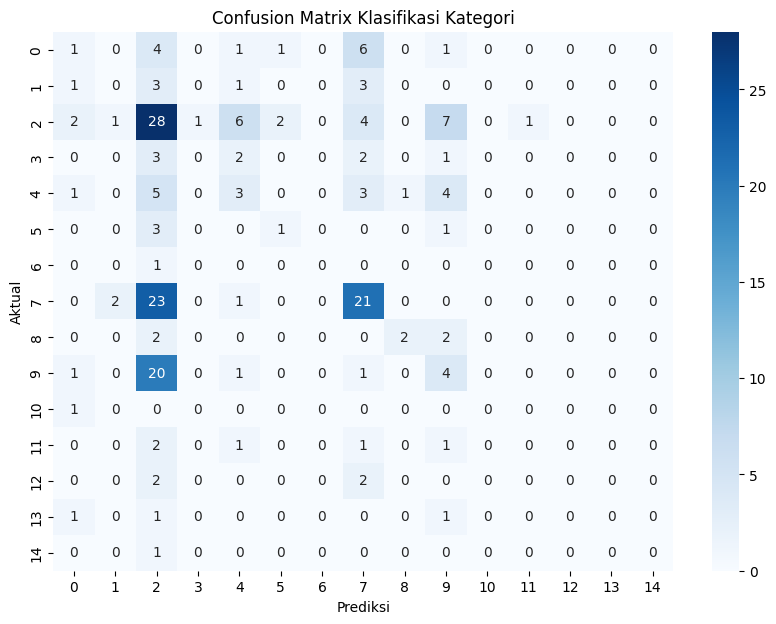

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ==========================================
# 1. DESKRIPSI DATASET
# ==========================================
# Memuat dataset
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

print("--- Informasi Dataset ---")
print(f"Jumlah Record: {df.shape[0]}")
print(f"Jumlah Atribut: {df.shape[1]}")
print("\nTipe Data:")
print(df.dtypes.value_counts())

# Menentukan Target: Kita akan memprediksi 'category' berdasarkan statistik performa
# Permasalahan: Mengklasifikasikan kategori channel berdasarkan performa (views, subs, uploads)

# ==========================================
# 2. PERSIAPAN DATA & PREPROCESSING
# ==========================================
# a. Data Cleaning (Handling Missing Values)
# Mengisi missing value numerik dengan median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Mengisi missing value kategorikal dengan mode
df['category'] = df['category'].fillna(df['category'].mode()[0])

# b. Feature Selection
# Memilih fitur yang relevan untuk klasifikasi
features = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_yearly_earnings']
X = df[features]
y = df['category']

# c. Encoding data kategorikal (Target)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# d. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# e. Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing Selesai: Data telah dibersihkan, di-encode, dan di-scale.")

# ==========================================
# 3. ANALISIS STATISTIK & VISUALISASI
# ==========================================
# Statistik Deskriptif
print("\nStatistik Deskriptif Fitur Utama:")
print(df[features].describe())

# Visualisasi Korelasi (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Performa YouTube')
plt.show()

# Distribusi Target
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Distribusi Kategori YouTube Channel')
plt.show()

# ==========================================
# 4. PEMILIHAN DAN PENERAPAN ALGORITMA
# ==========================================
# Nama Algoritma: Random Forest
# Alasan: Efektif untuk klasifikasi multikelas dan menangani data non-linear
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# ==========================================
# 5. PENGUJIAN DAN EVALUASI MODEL
# ==========================================
y_pred = model.predict(X_test_scaled)

print("\n--- Hasil Evaluasi Model ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
# Target names menggunakan kelas yang asli dari LabelEncoder
# Modifikasi: Menyesuaikan target_names dengan label yang ada di y_test
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=le.classes_[np.unique(y_test)], zero_division=0))

# Confusion Matrix (Visualisasi Ringkas)
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Klasifikasi Kategori')
plt.show()


--- TABEL PERBANDINGAN HASIL EVALUASI ---
    Algoritma  Accuracy  Precision  Recall  F1-Score
Random Forest     0.302      0.266   0.302     0.271
          KNN     0.296      0.281   0.296     0.275
          SVM     0.332      0.219   0.332     0.223


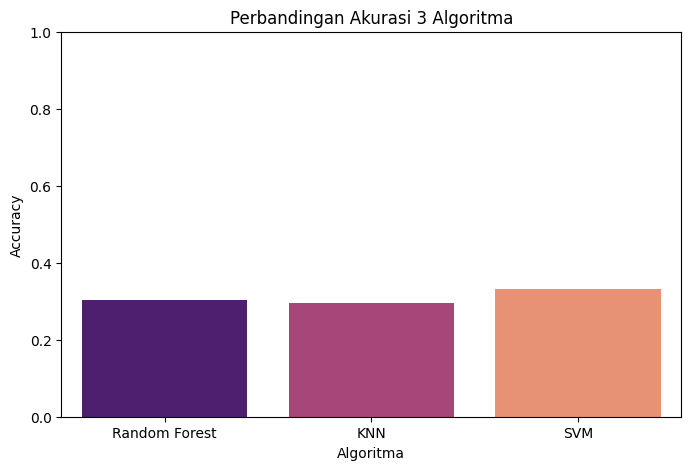

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# ==========================================
# 4. PEMILIHAN DAN PENERAPAN ALGORITMA (LANJUTAN)
# ==========================================

# Kita tambahkan dua algoritma baru untuk perbandingan
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', random_state=42)

# Training model tambahan
knn_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# ==========================================
# 5. PENGUJIAN DAN EVALUASI MODEL (PERBANDINGAN)
# ==========================================

# List model untuk iterasi evaluasi
models = {
    "Random Forest": model, # Model dari kode awal Anda
    "KNN": knn_model,
    "SVM": svm_model
}

comparison_results = []

for name, m in models.items():
    pred = m.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    # Menggunakan weighted average karena kategori sangat banyak (multiclass)
    prec = precision_score(y_test, pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, pred, average='weighted', zero_division=0)

    comparison_results.append({
        "Algoritma": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3)
    })

# Menampilkan Tabel Perbandingan Akhir
df_compare = pd.DataFrame(comparison_results)
print("\n--- TABEL PERBANDINGAN HASIL EVALUASI ---")
print(df_compare.to_string(index=False))

# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x='Algoritma', y='Accuracy', data=df_compare, palette='magma', hue='Algoritma', legend=False)
plt.title('Perbandingan Akurasi 3 Algoritma')
plt.ylim(0, 1)
plt.show()